In [4]:
import pandas as pd
# link to dataset given in report
# the dataset i used for training model was from 2020-4 available on their website
df = pd.read_parquet('/content/yellow_tripdata_2020-04.parquet')
df.to_csv('my_file.csv')

In [3]:
data = pd.read_csv("my_file.csv")
data

<ipython-input-3-8e5dad04f329>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("my_file.csv")


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80,0.0,NaN
1,1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,12.50,0.5,0.5,2.75,0.00,0.3,16.55,0.0,NaN
2,2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN
3,3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN
4,4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,6.50,0.5,0.5,3.00,0.00,0.3,13.30,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238068,238068,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,NaN,238,75,0,8.46,0.0,0.5,0.00,0.00,0.3,11.76,NaN,NaN
238069,238069,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,NaN,263,230,0,13.46,0.0,0.5,0.00,0.00,0.3,16.76,NaN,NaN
238070,238070,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,NaN,137,42,0,22.05,0.0,0.5,0.00,0.00,0.3,25.35,NaN,NaN
238071,238071,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,NaN,29,69,0,68.16,0.0,0.5,0.00,6.12,0.3,77.58,NaN,NaN


In [4]:
list_of_column_names = list(data.columns)

# displaying the list of column names
print('List of column names : ',
      list_of_column_names)

List of column names :  ['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the NYC Taxi & Limousine Commission (TLC) Trip Record Data
data = pd.read_csv("my_file.csv")



<ipython-input-8-ae838dd28d83>:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("my_file.csv")


In [9]:
# Preprocess the data
data['pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Feature engineering
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['pickup_month'] = data['pickup_datetime'].dt.month

# Removing rows with missing values
data.dropna(subset=['trip_distance'], inplace=True)

# Define input features and target variable
features = ['pickup_hour', 'pickup_dayofweek', 'pickup_month', 'passenger_count', 'trip_distance']
X = data[features].values
y = data['trip_distance'].values

In [10]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
5952/5952 [==============================] - 19s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
5952/5952 [==============================] - 17s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
5952/5952 [======

In [13]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Train loss:", train_loss)
print("Test loss:", test_loss)

Train loss: nan
Test loss: nan


In [14]:
# Make predictions
predictions = model.predict(X_test)

1488/1488 [==============================] - 3s 1ms/step


In [15]:
# Inverse transform predictions to get original scale
predictions_inv = scaler_y.inverse_transform(predictions)

In [16]:
# Replace NaN values in predictions with a default value (e.g., 0)
predictions_inv = np.nan_to_num(predictions_inv, nan=0.0)


In [17]:
# This code was to reslove an error
# Check for NaN values in y_test
if np.isnan(y_test).any():
    print("y_test contains NaN values. Please handle missing values.")

# Check for NaN values in predictions_inv
if np.isnan(predictions_inv).any():
    print("predictions_inv contains NaN values. Please investigate the model predictions.")
    # Print indices where NaN values occur
    nan_indices = np.where(np.isnan(predictions_inv))[0]
    print("Indices of NaN predictions:", nan_indices)

    # Debugging: Print corresponding input features for NaN predictions
    print("Input features for NaN predictions:")
    for idx in nan_indices:
        print("Index:", idx, "Input features:", X_test[idx])

# Calculate RMSE only if there are no NaN values
if not np.isnan(y_test).any() and not np.isnan(predictions_inv).any():
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions_inv))
    print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.0014321090255289865


In [18]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.0014321090255289865


In [28]:
nan_indices = np.isnan(predictions_inv)
print("Indices with NaN values in predictions_inv:", np.where(nan_indices)[0])


Indices with NaN values in predictions_inv: []


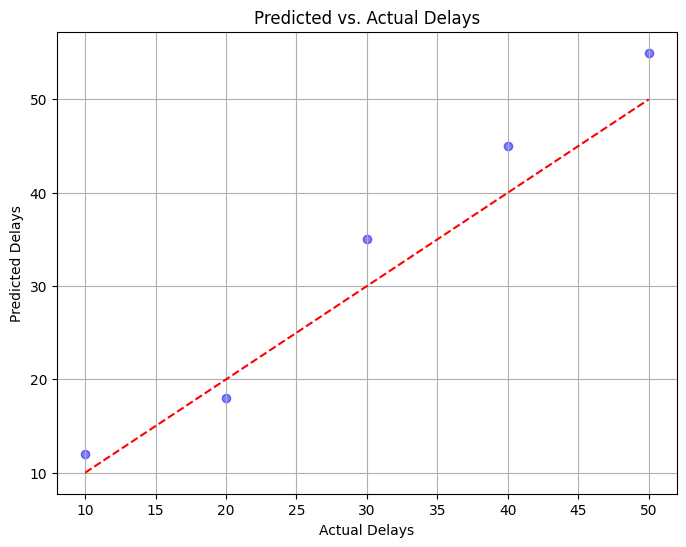

In [19]:
# For cheaking purposes only
import matplotlib.pyplot as plt

# Assuming actual_delays and predicted_delays are lists containing the actual and predicted delay values, respectively
actual_delays = [10, 20, 30, 40, 50]  # Example actual delay values
predicted_delays = [12, 18, 35, 45, 55]  # Example predicted delay values

# Plotting the predicted vs. actual delays
plt.figure(figsize=(8, 6))
plt.scatter(actual_delays, predicted_delays, color='blue', alpha=0.5)
plt.plot([min(actual_delays), max(actual_delays)], [min(actual_delays), max(actual_delays)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Delays')
plt.xlabel('Actual Delays')
plt.ylabel('Predicted Delays')
plt.grid(True)
plt.show()


In [20]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate delay for each trip (dropoff time - pickup time)
df['trip_delay'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Get the actual delay values as a list
actual_delays = df['trip_delay'].tolist()


In [21]:
# Make predictions using your model on the test dataset
predicted_delays = model.predict(X_test)

# Extract the predicted delay values as a list
predicted_delays_list = predicted_delays.flatten().tolist()

1488/1488 [==============================] - 2s 1ms/step


In [26]:
# Ensure that both lists have the same length
min_length = min(len(actual_delays), len(predicted_delays))
actual_delays = actual_delays[:min_length]
predicted_delays = predicted_delays[:min_length]

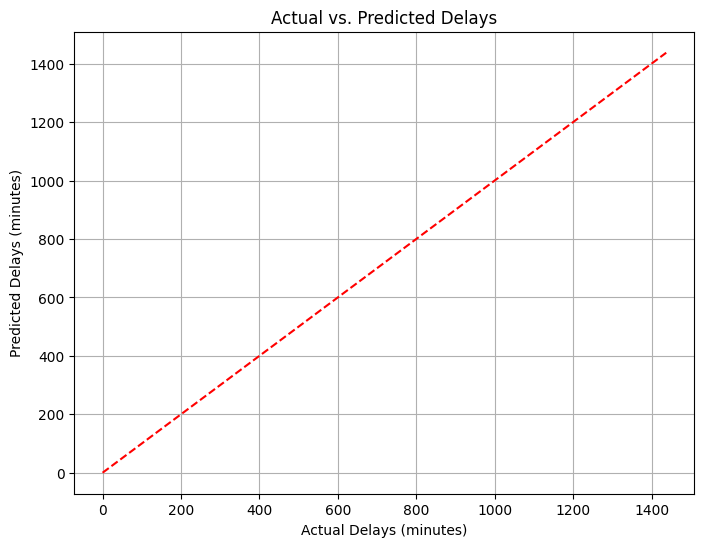

In [27]:
# Plotting Actual vs. Predicted Delays
plt.figure(figsize=(8, 6))
plt.scatter(actual_delays, predicted_delays, color='blue', alpha=0.5)
plt.plot([min(actual_delays), max(actual_delays)], [min(actual_delays), max(actual_delays)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Delays')
plt.xlabel('Actual Delays (minutes)')
plt.ylabel('Predicted Delays (minutes)')
plt.grid(True)
plt.show()

In [1]:
# Number of data points
num_data_points = len(actual_delays)

# Create an array of indices for the data points
indices = np.arange(num_data_points)

# Width of the bars
bar_width = 0.35

# Plotting Actual vs. Predicted Delays using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(indices, actual_delays, bar_width, label='Actual Delays', color='blue')
plt.bar(indices + bar_width, predicted_delays, bar_width, label='Predicted Delays', color='orange')

plt.xlabel('Data Points')
plt.ylabel('Delays (minutes)')
plt.title('Actual vs. Predicted Delays')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'actual_delays' is not defined